# Estadística con Scipy

In [1]:
from scipy import stats
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Breve repaso de medidas estadísticas importantes

In [2]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

In [3]:
np.mean(x) # promedio

3.1

In [4]:
np.median(x) # mediana

3.0

In [5]:
[np.min(x),np.max(x)] # [mínimo,máximo]

[0.9, 6.7]

In [6]:
[np.std(x),np.var(x)] # [desviación_estándar,varianza]

[1.7521415467935233, 3.0700000000000007]

## Generando algunos numeros aleatorios con numpy

In [7]:
[np.random.rand(2),np.random.randn(3),np.random.randint(low=-5, high=10, size=5)]
# [uniforme [0,1),normal estándar,uniforme [-5,10)]

[array([0.36349143, 0.57613624]),
 array([ 0.29286192, -0.68653054,  0.91149335]),
 array([-2,  6,  1,  7,  5])]

In [8]:
np.random.rand(5,1)

array([[0.11356062],
       [0.23143467],
       [0.96290115],
       [0.49602654],
       [0.61623776]])

In [9]:
np.random.randn(3,6)

array([[-0.70830793,  0.42395448, -0.75391626, -0.43921264,  1.01734984,
        -1.12722207],
       [-1.35672341, -0.54806817,  0.09378485, -2.23365879,  0.19490622,
        -0.38734449],
       [ 1.23336696, -0.41450442,  0.63053923, -0.21064813, -1.49920162,
         0.00807556]])

In [10]:
np.random.randint(low=0, high=6, size=(6, 2))

array([[1, 0],
       [2, 3],
       [4, 5],
       [5, 4],
       [1, 1],
       [5, 3]])

### Viendo algunas de sus distribuciones

Text(0.5, 1.0, 'Distribución uniforme en [0,6)')

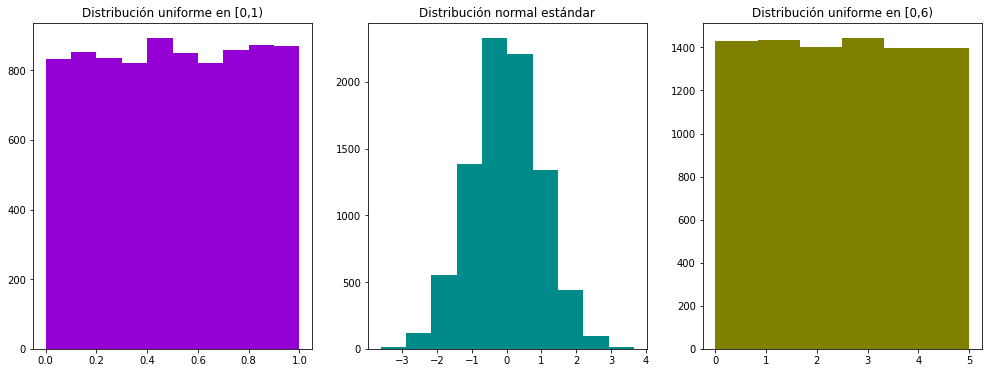

In [11]:
n_sample = 8500
fig, axes = plt.subplots(1, 3, figsize=(17, 6))

axes[0].hist(np.random.rand(n_sample),color="darkviolet")
axes[0].set_title("Distribución uniforme en [0,1)")

axes[1].hist(np.random.randn(n_sample),color = "darkcyan")
axes[1].set_title("Distribución normal estándar")

axes[2].hist(np.random.randint(low=0, high=6, size=n_sample),bins=6,color = "olive")
axes[2].set_title("Distribución uniforme en [0,6)")

In [12]:
np.random.choice(3, 5, replace = True) # Tomar una muestra aleatoria con reemplazamiento

array([0, 2, 0, 2, 2])

In [13]:
x_par = [2*t for t in range(0,11,1)] # Tomar una muestra aleatoria sin reemplazamiento
np.random.choice(x_par, 8, replace = False)

array([20,  4,  0,  2,  6, 16, 12, 10])

Podemos escoger una semilla para que los resultados de una simulación sean los mismos

In [14]:
np.random.seed(12345)

In [15]:
np.random.rand()

0.9296160928171479

Otra manera de fijar una semilla

In [16]:
prng = np.random.RandomState(123456789)

In [17]:
prng.randn(3, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514],
       [ 0.94302846,  0.8478706 ,  0.52969142, -0.56940469]])

In [18]:
prng.f(3, 5, size=(1, 3))

array([[1.52594336, 0.72220318, 0.23804219]])

In [19]:
prng.binomial(10, 0.5, size=7)

array([4, 7, 6, 8, 7, 4, 5])

In [20]:
prng.poisson(2.1, size=(5,2))

array([[3, 2],
       [2, 3],
       [2, 3],
       [3, 1],
       [2, 2]])

## Primeros acercamientos a stats

In [21]:
norm_data = stats.norm(2.5, 0.25)

In [22]:
[norm_data.mean(),norm_data.std(),norm_data.var()]

[2.5, 0.25, 0.0625]

In [23]:
[norm_data.pdf([2.5, 3.5, 4.15]),
 norm_data.cdf([2.5, 3.5, 4.15])]

[array([1.59576912e+00, 5.35320903e-04, 5.54671998e-10]),
 array([0.5       , 0.99996833, 1.        ])]

In [24]:
norm_data.interval(0.95)

(2.0100090038649867, 2.9899909961350133)

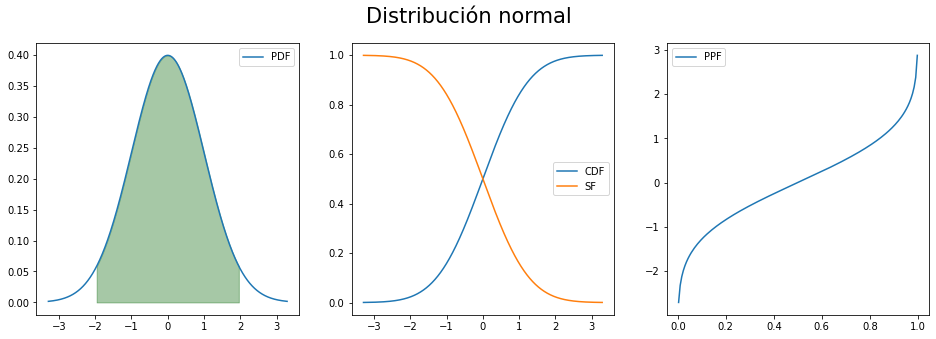

In [25]:
# Mi grafico, my notes
norm_data = stats.norm() # random variables

fig, axes = plt.subplots(1, 3, figsize=(16, 5)) #Size's plot

fig.suptitle('Distribución normal', fontsize=21)

x_min_999, x_max_999 = norm_data.interval(0.999) #range of the data
x999 = np.linspace(x_min_999, x_max_999, 1000)

x_min_95, x_max_95 = norm_data.interval(0.95)
x95 = np.linspace(x_min_95, x_max_95, 1000) #interval at level 95% 
    
axes[0].plot(x999, norm_data.pdf(x999), label="PDF")
axes[0].fill_between(x95, norm_data.pdf(x95), alpha=0.35,color="darkgreen")

axes[1].plot(x999, norm_data.cdf(x999), label="CDF")
axes[1].plot(x999, norm_data.sf(x999), label="SF")

axes[2].plot(x999, norm_data.ppf(x999), label="PPF")

for ax in axes: # Add all legends
    ax.legend()

In [26]:
[x_min_95, x_max_95] #Do you reconigze that interval?

[-1.959963984540054, 1.959963984540054]

In [27]:
[x999[0],x999[-1],len(x999)] # a,b & n

[-3.2905267314918945, 3.2905267314919255, 1000]

## Función uniforme en (-2,2)

$$ f(x) = \frac{1}{4}$$

In [28]:
unif_data = stats.uniform(loc=-2, scale=4)
# a < x < b -> a, a + loc = b -> loc = b-a 

In [29]:
unif_data

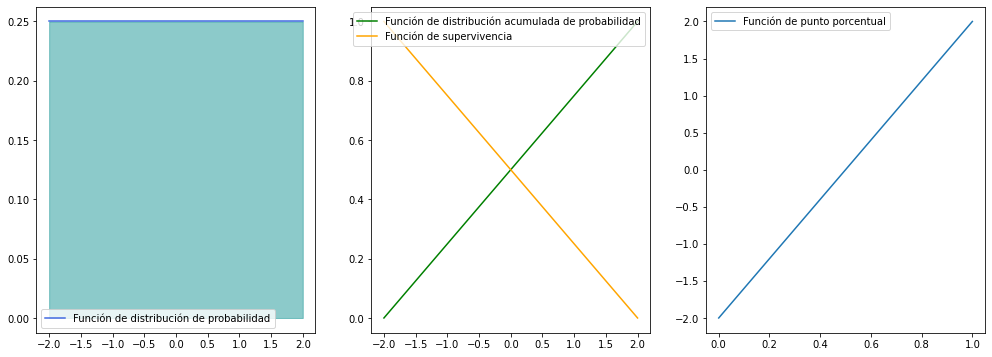

In [30]:
def f_dens_unif(a,b,x):
    return 1/(b-a)

def f_acum_unif(a,b,x):
    return (1/(b-a))*(x-a)

def f_percent_unif(a,b,percent):
    return ((b-a)*percent) + a

#Vectorizamos las funciones 
v_f_dens_unif = np.vectorize(f_dens_unif) 
v_f_acum_unif = np.vectorize(f_acum_unif)
v_f_percent_unif = np.vectorize(f_percent_unif)


a_unif = -2
b_unif = 2
x999 = np.linspace(a_unif, b_unif, 1000)

xpercent = np.linspace(0, 1, 100)

fig, axes = plt.subplots(1, 3, figsize=(17, 6))

axes[0].plot(x999, v_f_dens_unif(a_unif,b_unif,x999), label="Función de distribución de probabilidad",color = "royalblue")
axes[0].fill_between(x999, v_f_dens_unif(a_unif,b_unif,x999), alpha=0.45,color="darkcyan")
axes[0].legend()

axes[1].plot(x999, v_f_acum_unif(a_unif,b_unif,x999), label="Función de distribución acumulada de probabilidad", color="green")
axes[1].plot(x999, 1-v_f_acum_unif(a_unif,b_unif,x999), label="Función de supervivencia", color="orange")
axes[1].legend()

axes[2].plot(xpercent, v_f_percent_unif(a_unif,b_unif,xpercent), label="Función de punto porcentual")
axes[2].legend()

## Función T de Student

$$ f(x,\nu) = \frac{\Gamma \left( \frac{\nu + 1}{2}\right)}{\sqrt{\pi \nu} \Gamma \left( \frac{\nu}{2}\right) } \left( 1 + \frac{x^{2}}{\nu}\right)^{-\frac{\nu+1}{2}}$$

$$\nu := \textrm{grados de libertad} $$

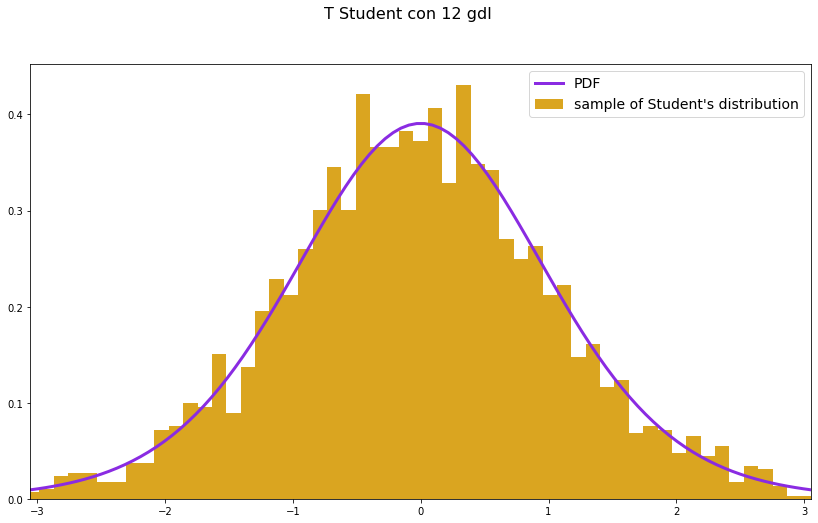

In [31]:
# Generando una muestra aleatoria que se distribuye como una T de Student con 12 gdl

n_sample = 2600
gdl_t = 12

t_data = stats.t(gdl_t)

x_lim = t_data.interval(.99)
x_values = np.linspace(*x_lim, num=100)

t_sample = t_data.rvs(n_sample)

fig, ax = plt.subplots(1,1,figsize=(14, 8))

fig.suptitle(t = 'T Student con {} gdl'.format(gdl_t), fontsize=16)

ax.plot(x_values, t_data.pdf(x_values), label="PDF", lw=3 ,color = "blueviolet")
ax.hist(t_sample, label="sample of Student's distribution", density = True, bins = 85, color = "goldenrod")

ax.set_xlim(*x_lim)
ax.legend(fontsize=14)

C:\Users\Alejandro Zavala\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Alejandro Zavala\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


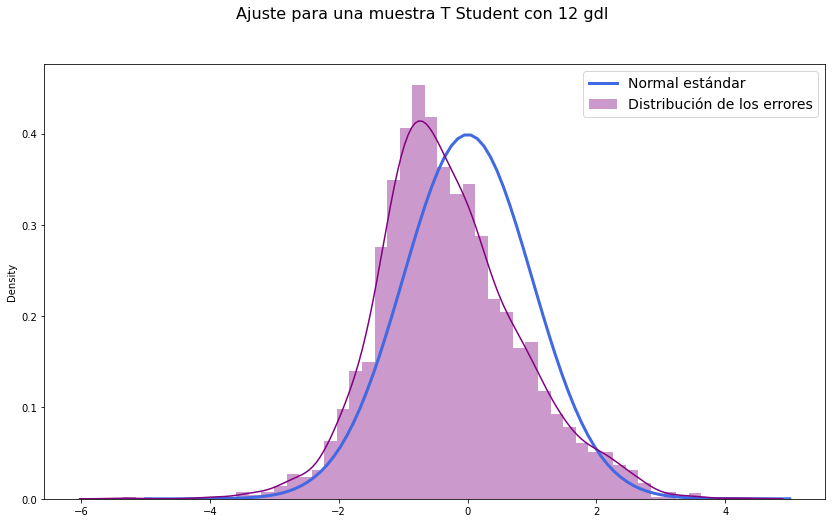

In [32]:
# Viendo la distribucion de los errores


fig, ax = plt.subplots(1,1,figsize=(14, 8))

fig.suptitle(t = 'Ajuste para una muestra T Student con {} gdl'.format(gdl_t), fontsize=16)

x_values = np.linspace(-5,5, num=100)

norm_estandar_data = stats.norm()
sns.lineplot(x_values, norm_estandar_data.pdf(x_values), label="Normal estándar", lw=3 ,color = "royalblue")
sns.distplot(t_sample - t_data.pdf(t_sample),label="Distribución de los errores",color = "purple")
ax.legend(fontsize=14)